In [83]:
import numpy as np
from plot_params import *
from copy import deepcopy
from scipy.spatial.distance import cdist
from scipy.optimize import minimize

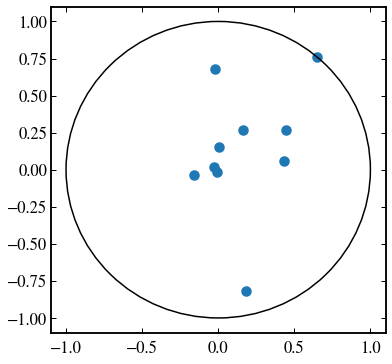

In [84]:
# generate particles
n = 10
r = np.random.rand(n)
theta = np.random.rand(n) * 2 * np.pi
x = np.cos(theta) * r
y = np.sin(theta) * r
pos = np.stack((x, y), axis=1)

# plot them on a circle 
pos = np.stack((x, y), axis=1)
plt.figure(figsize=(6, 6))
plt.scatter(pos[:, 0], pos[:, 1])
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)

In [85]:
def rotation(pos, theta_rotation):
    # get polar coordinates
    x = pos[:, 0]
    y = pos[:, 1]
    r = np.sqrt(x ** 2 + y ** 2)
    theta = np.arctan2(y, x)

    # add an angle
    theta = theta + theta_rotation

    # back to cartesian
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    pos = np.stack((x, y), axis=1)

    return pos

def difference_score(theta_rotation, standard_pos, pos):
    # rotate
    pos = rotation(pos, theta_rotation)

    # return distance score
    return cdist(standard_pos, pos).min(axis=1).sum()

def get_minimized_config(standard_pos, pos, precision=1000):

    radians = np.linspace(0, 2 * np.pi, precision)
    scores = [difference_score(r, standard_pos, pos) for r in radians]
    best_radian = radians[np.argmin(scores)]
    return rotation(pos, best_radian)    

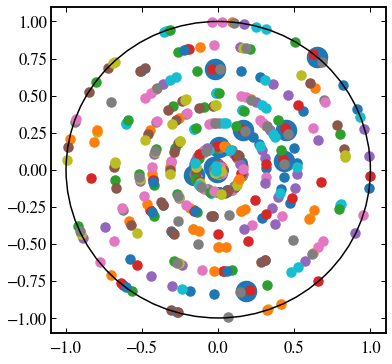

In [86]:
# create a bunch of perturbed versions of the original configuration

standard_pos = pos
perturbed_pos = []

for _ in range(50):
    theta = np.random.rand() * 2 * np.pi
    offset = np.random.rand(n, 2) * 0
    p = rotation(standard_pos, theta) + offset
    perturbed_pos.append(p)

plt.figure(figsize=(6, 6))
for p in perturbed_pos:
    plt.scatter(p[:, 0], p[:, 1])
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)
plt.scatter(standard_pos[:, 0], standard_pos[:, 1], s=400, zorder=-100)
plt.show()

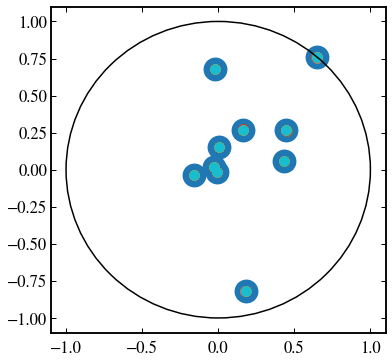

In [87]:
radians = np.linspace(0, 2 * np.pi, 1000)
plt.figure(figsize=(6, 6))

for p in perturbed_pos:
    plot_p = get_minimized_config(standard_pos, p)
    plt.scatter(plot_p[:, 0], plot_p[:, 1])
plt.scatter(standard_pos[:, 0], standard_pos[:, 1], s=500, zorder=-100)
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)
plt.show()
